In [110]:
'''
UTFPR - Cornélio Procópio
Disciplina: INTELIGÊNCIA ARTIFICIAL
Trabalho de Machine Learning
Aluno: Leonardo Batista
RA: 1885189
'''

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [111]:
#Carregando o dataset

file = pd.read_csv('C:/Users/leonardo/Documents/GitHub/AI-project/car.csv')
file = file.rename(columns={'vhigh': 'buying', 'vhigh.1': 'maint', '2': 'doors', '2.1': 'persons', 'small': 'lug_boot', 'low': 'safety', 'unacc': 'class'})

In [112]:
#transformando as strings em float

file['buying'] = file['buying'].replace('low', 0)
file['buying'] = file['buying'].replace('med', 1)
file['buying'] = file['buying'].replace('high', 2)
file['buying'] = file['buying'].replace('vhigh', 3)

file['maint'] = file['maint'].replace('low', 0)
file['maint'] = file['maint'].replace('med', 1)
file['maint'] = file['maint'].replace('high', 2)
file['maint'] = file['maint'].replace('vhigh', 3)

file['doors'] = file['doors'].replace('5more', 5)
file['persons'] = file['persons'].replace('more', 5)

file['lug_boot'] = file['lug_boot'].replace('small', 0)
file['lug_boot'] = file['lug_boot'].replace('med', 1)
file['lug_boot'] = file['lug_boot'].replace('big', 2)

file['safety'] = file['safety'].replace('low', 0)
file['safety'] = file['safety'].replace('med', 1)
file['safety'] = file['safety'].replace('high', 2)

file['class'] = file['class'].replace('unacc', 0)
file['class'] = file['class'].replace('acc', 1)
file['class'] = file['class'].replace('good', 2)
file['class'] = file['class'].replace('vgood', 3)

y = file['class']                  ##Separando variáveis entre predicado e variável alvo
x = file.drop('class', axis = 1)   ##


In [113]:
#Fazendo o teste, com 20% para teste

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

model = ExtraTreesClassifier()   ##Usando Decision Tree
model.fit(x_train, y_train)

ExtraTreesClassifier()

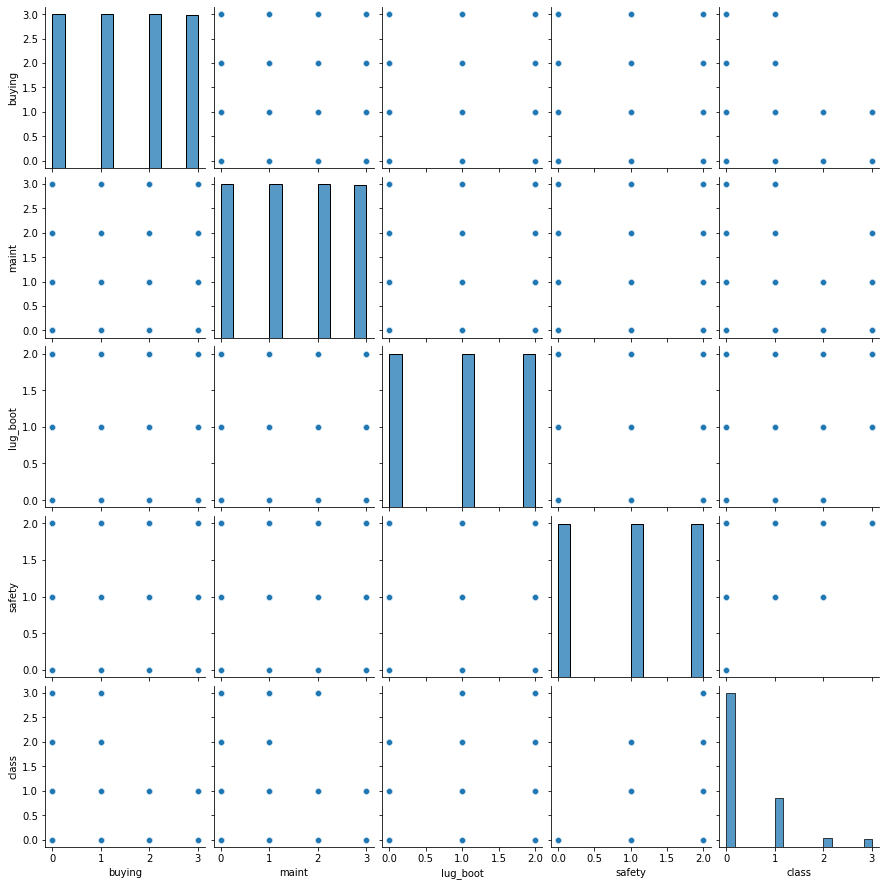

In [114]:
#Plotando matriz de dispersão

sns.pairplot(file)

<AxesSubplot:>

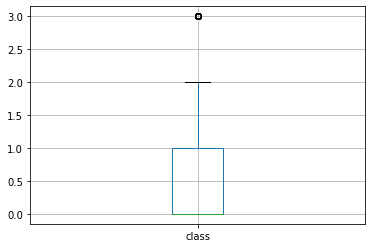

In [115]:
#Plotando box plot

file.boxplot(column='class')

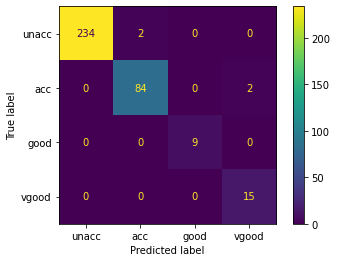

In [116]:
#Plotando a matriz de confusão

plot_confusion_matrix(model, x_test, y_test, display_labels = ['unacc','acc','good','vgood'])
plt.show()

In [117]:
#Acruacia

previous = model.predict(x_test)
accuracy_score(previous, y_test)

0.9884393063583815

In [118]:
#Renovação

list(recall_score(y_test, previous, average=None))

[0.9915254237288136, 0.9767441860465116, 1.0, 1.0]

In [119]:
#Precisão

list(precision_score(y_test, previous, average=None))

[1.0, 0.9767441860465116, 1.0, 0.8823529411764706]

In [120]:
#F1-score

list(f1_score(y_test, previous, average=None))

[0.9957446808510638, 0.9767441860465116, 1.0, 0.9375]